In [1]:
#Import Libraries

import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
a=20
b=0.2
c=2*math.pi
d=2
def ackley(x):
    z=(-a*math.exp(-b*(math.sqrt((np.sum(np.square(x)))/d)))-math.exp((np.sum(np.cos(c*x)))/d)+a+math.exp(1))
    return z

In [3]:
# Parameter setting

d=2
xMin,xMax=-32.768,32.768
vMin,vMax=float(-0.1*(xMax-xMin)),float(0.1*(xMax-xMin))
MaxIt=2000
ps=10
c1=2
c2=2
w=0.9-((0.9-0.4)/MaxIt)*np.linspace(0,MaxIt,MaxIt)


In [4]:
# Setting limits

def limitV(V):
    for i in range(len(V)):
        if V[i] > vMax:
            V[i]=vMax
        if V[i] < vMin:
            V[i] = vMin
    return V

def limitX(X):
    for i in range(len(X)):
        if X[i] > xMax:
            X[i]=xMax
        if X[i] < xMin:
            X[i] = xMin
    return X

Best Fitness value= 4.440892098500626e-16
[[-9.82863170e-17  1.86958150e-16]
 [ 1.42610963e-16 -1.05040184e-16]
 [-1.17499608e-17 -3.11329668e-16]
 [ 2.73903219e-16  3.71625675e-16]
 [ 1.78505025e-16 -3.21072737e-16]
 [ 2.26211135e-16 -7.42121417e-17]
 [-1.27792498e-16  1.06082410e-16]
 [ 1.97417225e-16 -1.79513295e-16]
 [ 1.03227809e-16  1.48528157e-16]
 [ 1.15388540e-16  3.34457253e-17]]


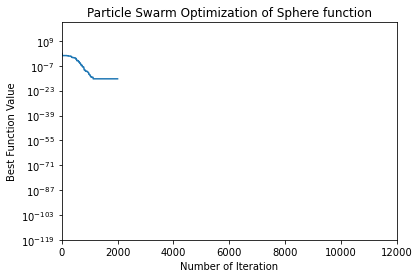

In [5]:
# Algorithm

def Optimization():
    class particle():
        def __init__(self):
            self.position=np.random.uniform(xMin,xMax,[ps,d])
            self.velocity=np.random.uniform(vMin,vMax,[ps,d])
            self.cost=np.zeros(ps)
            self.cost[:]=ackley(self.position[:])
            self.pbest=np.copy(self.position)
            self.pbest_cost=np.copy(self.cost)
            self.index=np.argmin(self.pbest_cost)
            self.gbest=self.pbest[self.index]
            self.gbest_cost=self.pbest_cost[self.index]
            self.BestCost=np.zeros(MaxIt)
        def Evaluate(self):
            for it in range(MaxIt):
                for i in range(ps):
                    self.velocity[i]=(w[it]*self.velocity[i]
                                      +c1*np.random.rand(d)*(self.pbest[i]-self.position[i])
                                      +c2*np.random.rand(d)*(self.gbest - self.position[i]))
                    self.velocity[i]=limitV(self.velocity[i])
                    self.position[i]=self.position[i]+self.velocity[i]
                    self.position[i]=limitX(self.position[i])
                    self.cost[i]=ackley(self.position[i])
                    if self.cost[i]<self.pbest_cost[i]:
                        self.pbest[i]=self.position[i]
                        self.pbest_cost[i]=self.cost[i]
                        if self.pbest_cost[i] < self.gbest_cost:
                            self.gbest=self.pbest[i]
                            self.gbest_cost=self.pbest_cost[i]
                self.BestCost[it]=self.gbest_cost 

# Printing the value
               
        def execute(self):
            
            print('Best Fitness value=',self.gbest_cost)
            print(self.position)
        
        def plot(self):
            plt.semilogy(self.BestCost)
           
            plt.ylim([10e-120,10e20])
            plt.xlim([0,12000])
            plt.ylabel('Best Function Value')
            plt.xlabel('Number of Iteration')
            plt.title('Particle Swarm Optimization of Sphere function')
    a=particle()
    a.Evaluate()
    a.execute()
    a.plot()
Optimization()

In [8]:
x=np.random.uniform(2,3,[4,2])
x

array([[2.27975863, 2.11399245],
       [2.09234375, 2.02475036],
       [2.0192235 , 2.55691602],
       [2.68021071, 2.7525624 ]])

In [9]:
x[0]

array([2.27975863, 2.11399245])

In [7]:
sum(a)

array([10.50114047,  9.23536837])

In [32]:
print(np.cos(2))
print(math.cos(2))

-0.4161468365471424
-0.4161468365471424


In [31]:
a=20
b=0.2
c=2*math.pi
d=2
z=(-a*math.exp(-b*(math.sqrt((np.sum(np.square(x)))/d)))-math.exp((np.sum(np.cos(c*x)))/d)+a+math.exp(1))

In [13]:
math.sqrt((np.sum(np.square(x[0])))/d)

2.19843847604291

In [30]:
(np.sum(np.cos(c*x)))/d

1.0200838336202087

In [19]:
1 * [2, 3]

[2, 3]

In [26]:
math.exp(np.sum(math.cos(np.sum(c*x))))/d

0.18536073183117907

In [25]:
(-b*(math.sqrt((np.sum(np.square(x)))/d)))

-0.9329415003933115